# Лабораторная работа "Цифровой осциллограф"
Радиофизическая лаборатория, ФРКТ МФТИ

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [3]:
def analyse(file, const_level=0, window='boxcar'):
    f = open(file)
    str1 = f.read().split('\n')
    f.closed
    plt.rcParams['font.size'] = '12'
    figsize=[8, 4]

    # dt
    val, unit = str1[1].replace(',', '.').split(' ')[3:5]
    val=float(val)
    if unit=='uS':
        val*=1e-6
    elif unit=='nS':
        val*=1e-9
    elif unit=='mS':
        val*=1e-3    
    fs = int(1.0 / val)
    
    #Voltage step 
    val, unit = str1[2].replace(',', '.').split(' ')[3:5]
    dv=float(val)
    if unit=='mV':
        dv*=1e-3  


    # Zero level
    zero_level= int(str1[3].split(' ')[3])
    str_num = len(str1)
    signal_lev = np.empty(shape=(str_num-8), dtype=float)
    for k, u in enumerate(range(7, str_num-1, 1)):
        data = str1[u].split()
        signal_lev[k]=(int(data[1])-zero_level)*dv-const_level
        
    window = signal.get_window(window, Nx=len(signal_lev), fftbins=True)
    signal_lev = signal_lev*window
    plt.figure(figsize=figsize)
    plt.plot(np.arange(signal_lev.size)/fs*1e3, signal_lev, '.-')
    plt.title("Сигнал")
    plt.xlabel("$t$, мc")
    plt.ylabel("$x(k\Delta t)w[k]$, В")
    plt.grid()
    plt.tight_layout()
    Xn = np.fft.fftshift(np.fft.fft(signal_lev, 2**18))
    f = fs*np.linspace(-0.5, 0.5, num=Xn.size, endpoint=False)
#     plt.show()

    plt.figure(figsize=figsize)
    plt.title("ДВПФ (модуль), линейный масштаб")
    plt.plot(f/1e3, abs(Xn))
    plt.grid()
    plt.xlabel("$f$, кГц")
    plt.ylabel("$|X(f)|$")
    plt.tight_layout()
#     plt.show()

    plt.figure(figsize=figsize)
    maxXn=max(abs(Xn))
    plt.title("ДВПФ (модуль), дБ")
    plt.plot(f/1e3, 20*np.log10(abs(Xn)/maxXn))
    plt.grid()
    plt.xlabel("$f$, кГц")
    plt.ylabel("АЧХ, дБ")
    plt.tight_layout()
#     plt.show()

<IPython.core.display.Javascript object>


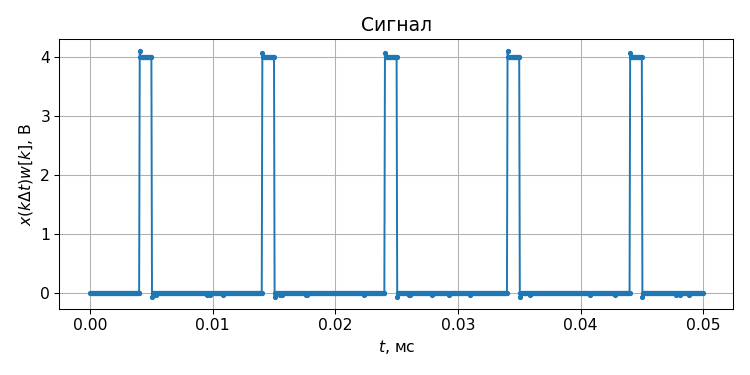

<IPython.core.display.Javascript object>


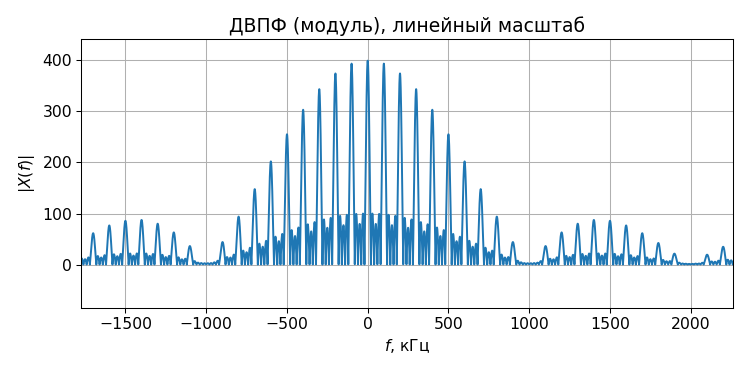

<IPython.core.display.Javascript object>


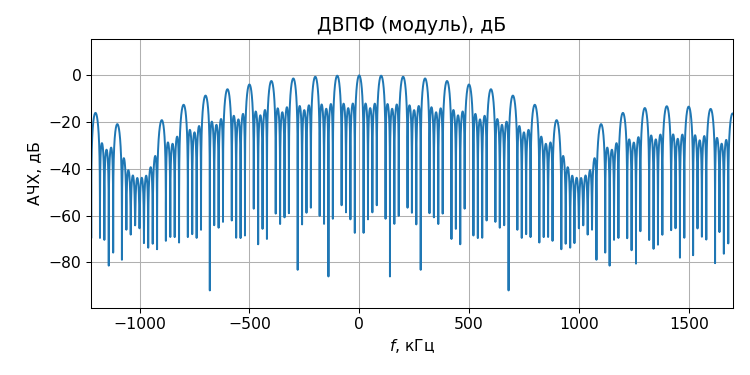

C:\Users\torma\AppData\Local\Temp/ipykernel_4504/4188270231.py:64: RuntimeWarning: divide by zero encountered in log10
  plt.plot(f/1e3, 20*np.log10(abs(Xn)/maxXn))


In [5]:
analyse(file='a1.txt', const_level=0, window='boxcar')